In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel('dataset.xlsx')

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df_clean = df[df['CustomerID'].notnull()].copy()
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)
df_clean['TotalSpend'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [5]:
df_clean.shape

(406829, 9)

In [6]:
customer_data = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',    
    'Quantity': 'sum',         
    'TotalSpend': 'sum',       
    'InvoiceDate': 'max'       
}).reset_index()

customer_data.columns = ['CustomerID', 'PurchaseFrequency', 'TotalQuantity', 'TotalSpend', 'LastPurchaseDate']
most_recent_date = df_clean['InvoiceDate'].max()
customer_data['Recency'] = (most_recent_date - customer_data['LastPurchaseDate']).dt.days
customer_data = customer_data.drop(columns=['LastPurchaseDate'])


In [7]:
customer_data

,CustomerID,PurchaseFrequency,TotalQuantity,TotalSpend,Recency
0,12346,2,0,0.00,325
1,12347,7,2458,4310.00,1
2,12348,4,2341,1797.24,74
3,12349,1,631,1757.55,18
4,12350,1,197,334.40,309
...,...,...,...,...,...
4367,18280,1,45,180.60,277
4368,18281,1,54,80.82,180
4369,18282,3,98,176.60,7
4370,18283,16,1397,2094.88,3


In [8]:
scaler = StandardScaler()

In [9]:
features = ['PurchaseFrequency', 'TotalQuantity', 'TotalSpend', 'Recency']

scaled_features = scaler.fit_transform(customer_data[features])
scaled_customer_data = pd.DataFrame(scaled_features, columns=features)

In [10]:
scaled_features

array([[-0.32936215, -0.24021456, -0.23100099,  2.32202285],
       [ 0.20610242,  0.28586959,  0.29343167, -0.89373323],
       [-0.11517632,  0.26082816, -0.01231622, -0.1691956 ],
       ...,
       [-0.22226923, -0.21923969, -0.20951263, -0.83418219],
       [ 1.16993863,  0.05878444,  0.02390005, -0.87388289],
       [-0.22226923,  0.09923599, -0.00744423, -0.48680114]])

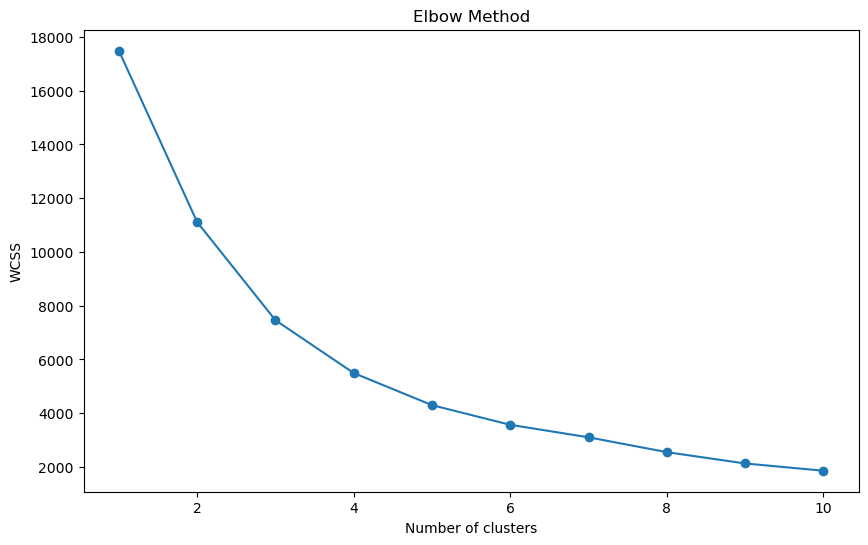

In [149]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_customer_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:

features = ['PurchaseFrequency', 'TotalQuantity', 'TotalSpend', 'Recency']
X_train = customer_data[features]

X_scaled = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=5, random_state=42)

In [13]:
X_scaled

array([[-0.32936215, -0.24021456, -0.23100099,  2.32202285],
       [ 0.20610242,  0.28586959,  0.29343167, -0.89373323],
       [-0.11517632,  0.26082816, -0.01231622, -0.1691956 ],
       ...,
       [-0.22226923, -0.21923969, -0.20951263, -0.83418219],
       [ 1.16993863,  0.05878444,  0.02390005, -0.87388289],
       [-0.22226923,  0.09923599, -0.00744423, -0.48680114]])

In [12]:
inertia = kmeans.inertia_
print(f"Inertia of the model: {inertia}")


Inertia of the model: 4298.599723750648


In [134]:
customer_data

,CustomerID,PurchaseFrequency,TotalQuantity,TotalSpend,Recency
0,12346,2,0,0.00,325
1,12347,7,2458,4310.00,1
2,12348,4,2341,1797.24,74
3,12349,1,631,1757.55,18
4,12350,1,197,334.40,309
...,...,...,...,...,...
4367,18280,1,45,180.60,277
4368,18281,1,54,80.82,180
4369,18282,3,98,176.60,7
4370,18283,16,1397,2094.88,3


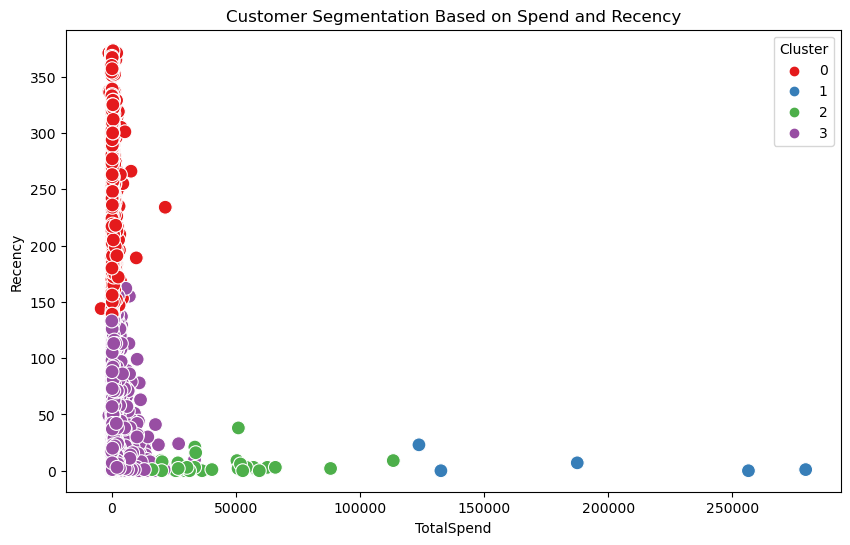

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalSpend', y='Recency', hue='Cluster', data=customer_data, palette='Set1', s=100)
plt.title('Customer Segmentation Based on Spend and Recency')
plt.show()

In [39]:
for cluster in range(4):
    print(f"Cluster {cluster} Statistics:")
    print(customer_data[customer_data['Cluster'] == cluster][['PurchaseFrequency', 'TotalQuantity', 'TotalSpend', 'Recency']].describe())


Cluster 0 Statistics:
       PurchaseFrequency  TotalQuantity    TotalSpend      Recency
count        1109.000000    1109.000000   1109.000000  1109.000000
mean            1.848512     259.647430    458.809739   244.981064
std             1.745171     495.505528    909.296127    68.438229
min             1.000000    -303.000000  -4287.630000   135.000000
25%             1.000000      73.000000    155.800000   185.000000
50%             1.000000     144.000000    297.780000   240.000000
75%             2.000000     289.000000    508.800000   300.000000
max            35.000000    9014.000000  21535.900000   373.000000
Cluster 1 Statistics:
       PurchaseFrequency  TotalQuantity   TotalSpend    Recency
count           5.000000       5.000000       5.0000   5.000000
mean           93.600000   96858.400000  195941.5500   6.200000
std            88.279669   56103.318523   70608.7937   9.833616
min            26.000000   64122.000000  123725.4500   0.000000
25%            55.000000   69029.

In [14]:
def predict_customer_segment(new_data, scaler, kmeans_model):
    """
    Predicts the customer segment for new customer data.
    
    Parameters:
    new_data (pd.DataFrame): A DataFrame with new customer data (same features as used in training: PurchaseFrequency, TotalQuantity, TotalSpend, Recency).
    scaler (StandardScaler): The scaler used during training for feature scaling.
    kmeans_model (KMeans): The trained KMeans model.
    
    Returns:
    int: The predicted cluster (segment) for the new customer.
    """
    # Ensure the new data has the correct feature columns
    required_features = ['PurchaseFrequency', 'TotalQuantity', 'TotalSpend', 'Recency']
    
    # Check if the necessary features are present in new_data
    if not all(feature in new_data.columns for feature in required_features):
        raise ValueError(f"New data must contain these features: {required_features}")
    
    # Reset index to avoid issues with index if necessary
    new_data = new_data[required_features].reset_index(drop=True)
    
    # Scale the new customer data using the same scaler
    scaled_data = scaler.transform(new_data)
    
    # Predict the cluster using the KMeans model
    cluster = kmeans_model.predict(scaled_data)
    
    return cluster[0]  # Return the predicted cluster


The new customer belongs to cluster: 2


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [18]:
import joblib 
joblib .dump(kmeans, 'customerSegmentationKmeans.pkl')
# joblib .dump(scaler, 'customerSegmentationScaler.pkl')

['customerSegmentationKmeans.pkl']

In [99]:
import joblib
model = joblib.load('customerSegmentationScaler.pkl')

In [15]:
ss = ['PurchaseFrequency', 'TotalQuantity', 'TotalSpend', 'Recency']

# New customer data (ensure it's a DataFrame with valid column names)
new_customer = pd.DataFrame({
    'PurchaseFrequency': [500],
    'TotalQuantity': [300],
    'TotalSpend': [100],
    'Recency': [15]
})

# Predict the customer segment
predicted_cluster = predict_customer_segment(new_customer, scaler, kmeans)
print(f'The new customer belongs to cluster: {predicted_cluster}')



The new customer belongs to cluster: 1


In [16]:
ano = scaler.transform(new_customer[ss])

In [17]:
bef = scaler.transform(X_train)

kmeans.score(bef, y=None, sample_weight=None)
# len(bef)

-4298.599723750649

In [8]:
ddff = pd.read_excel('filtered_out_csv.xlsx')

In [9]:
ddff

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom
